In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# from google.colab import drive
# drive.mount('/content/drive')

link país = https://www.gov.br/produtividade-e-comercio-exterior/pt-br/balanca/bd/tabelas/PAIS.csv/view

link bases - https://www.cnpuv.embrapa.br/vitibrazil/index.php?opcao=opt_02

countries = https://developers.google.com/public-data/docs/canonical/countries_csv

In [126]:

## -- Arquivos base -- ##

# Exportação
exp_vinho = '../data/doc/ExpVinho.csv'
exp_espumante = '../data/doc/ExpEspumantes.csv'
exp_suco = '../data/doc/ExpSuco.csv'
exp_uva = '../data/doc/ExpUva.csv'

# importação
imp_espumante = '../data/doc/ImpEspumantes.csv'
imp_frescas = '../data/doc/ImpFrescas.csv'
imp_passas = '../data/doc/ImpPassas.csv'
imp_suco = '../data/doc/ImpSuco.csv'
imp_vinhos = '../data/doc/ImpVinhos.csv'

# Processamento
processa_americanas = '../data/doc/ProcessaAmericanas.csv'
processa_mesa = '../data/doc/ProcessaMesa.csv'
processa_sem_class = '../data/doc/ProcessaSemclass.csv'
processa_viniferas = '../data/doc/ProcessaViniferas.csv'

# produção
producao = '../data/doc/Producao.csv'

# Comercialização
comercio = '../data/doc/Comercio.csv'

pais = '../data/doc/pais.csv'

## -- Dataframes -- ##

# Exportação
df_exp_vinho = pd.read_csv(exp_vinho, delimiter=';')
df_exp_espumante = pd.read_csv(exp_espumante, delimiter=';')
df_exp_suco = pd.read_csv(exp_suco, delimiter=';')
df_exp_uva = pd.read_csv(exp_uva, delimiter=';')

# importação
df_imp_vinhos = pd.read_csv(imp_vinhos, delimiter=';')
df_imp_espumante = pd.read_csv(imp_espumante, delimiter=';')
df_imp_frescas = pd.read_csv(imp_frescas, delimiter=';')
df_imp_passas = pd.read_csv(imp_passas, delimiter=';')
df_imp_suco = pd.read_csv(imp_suco, delimiter=';')

# Processamento
df_processa_viniferas = pd.read_csv(processa_viniferas, delimiter='\t')
df_processa_americanas = pd.read_csv(processa_americanas, delimiter=';')
df_processa_mesa = pd.read_csv(processa_mesa, delimiter=';')
df_processa_sem_class = pd.read_csv(processa_sem_class, delimiter=';')

# produção
df_producao = pd.read_csv(producao, delimiter=';')

# Comercialização
df_comercio = pd.read_csv(comercio, delimiter=';')

# base país
df_pais = pd.read_csv(pais, delimiter=';', encoding='latin-1')

In [127]:
df_pais

,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
0,0,898,ZZZ,Não Definido,Not defined,No definido
1,13,4,AFG,Afeganistão,Afghanistan,Afganistan
2,15,248,ALA,"Aland, Ilhas",Aland Islands,"Alans, Islas"
3,17,8,ALB,Albânia,Albania,Albania
4,20,724,ESP,"Alboran-Perejil, Ilhas","Alboran-Perejil, Islands","Alboran-Perejil, Islas"
...,...,...,...,...,...,...
276,994,898,ZZZ,A Designar,To define,A designar
277,995,898,ZZZ,Bancos Centrais,Central Banks,Bancos Centrales
278,997,898,ZZZ,Organizações Internacionais,International Organizations,Organizaciones Internacionales
279,998,898,ZZZ,Sem informação,Sem informação,Sem informação


#### Total Vinho

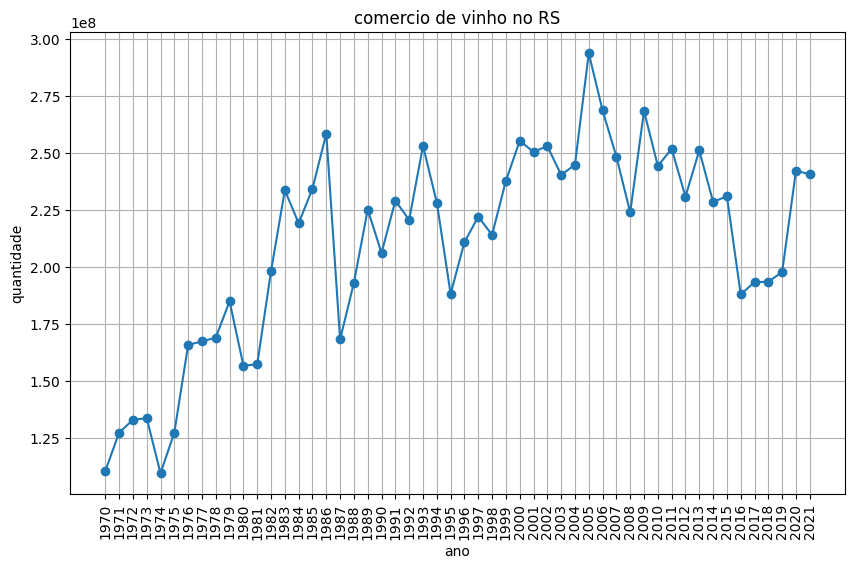

In [128]:

df_comercio_vinho = df_comercio.drop([df_comercio.columns[0], df_comercio.columns[2]], axis=1)
df_comercio_vinho.set_index('ANO', inplace=True)

df_comercio_vinho_grafico = df_comercio_vinho.transpose()
df_comercio_vinho_grafico = df_comercio_vinho_grafico.iloc[:, :15]

df_comercio_vinho_grafico['Total Vinho'] = (df_comercio_vinho_grafico['VINHO  FINO DE MESA'] +
                                            df_comercio_vinho_grafico['VINHO DE MESA'] + 
                                            df_comercio_vinho_grafico['VINHO ESPECIAL'] + 
                                            df_comercio_vinho_grafico['VINHO FRIZANTE'] + 
                                            df_comercio_vinho_grafico['VINHO ORGÂNICO'])

plt.figure(figsize=(10, 6))
plt.plot(df_comercio_vinho_grafico.index, df_comercio_vinho_grafico['Total Vinho'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('comercio de vinho no RS')
plt.xlabel('ano')
plt.ylabel('quantidade')
plt.show()

#### Tabela Exp_vinho

In [129]:
df_exp_vinho_qtde = df_exp_vinho.drop(columns={'Id'})

# Filtrar colunas de quantidade e valor
colunas_qtde = [col for col in df_exp_vinho_qtde.columns if not col.endswith('.1')]
colunas_valor = [col for col in df_exp_vinho_qtde.columns if col.endswith('.1')]

# Assegurar que 'País' não seja incluído nas somas
colunas_qtde.remove('País')

# Calcular a soma das quantidades e valores
df_exp_vinho_qtde['qtde_total'] = df_exp_vinho_qtde[colunas_qtde].sum(axis=1)
df_exp_vinho_qtde['valor_total'] = df_exp_vinho_qtde[colunas_valor].sum(axis=1)

df_exp_vinho_qtde.head()


,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,qtde_total,valor_total
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,11,46
1,África do Sul,0,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,493,1789
2,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,...,3660,25467,6261,32605,2698,6741,7630,45367,1206001,3121585
3,Angola,0,0,0,0,0,0,0,0,0,...,345,1065,0,0,0,0,4068,4761,5819857,4859836
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,454,186


In [139]:
df_exp_vinho_qtde[['País', 'valor_total']].sort_values(by='valor_total', ascending=False).head(10)

,País,valor_total
97,Paraguai,85606168
48,Estados Unidos,71504688
105,Rússia,25914397
103,Reino Unido,8317001
75,Japão,7043882
3,Angola,4859836
28,China,4778033
95,Países Baixos,4287747
47,Espanha,3867723
2,"Alemanha, República Democrática",3121585


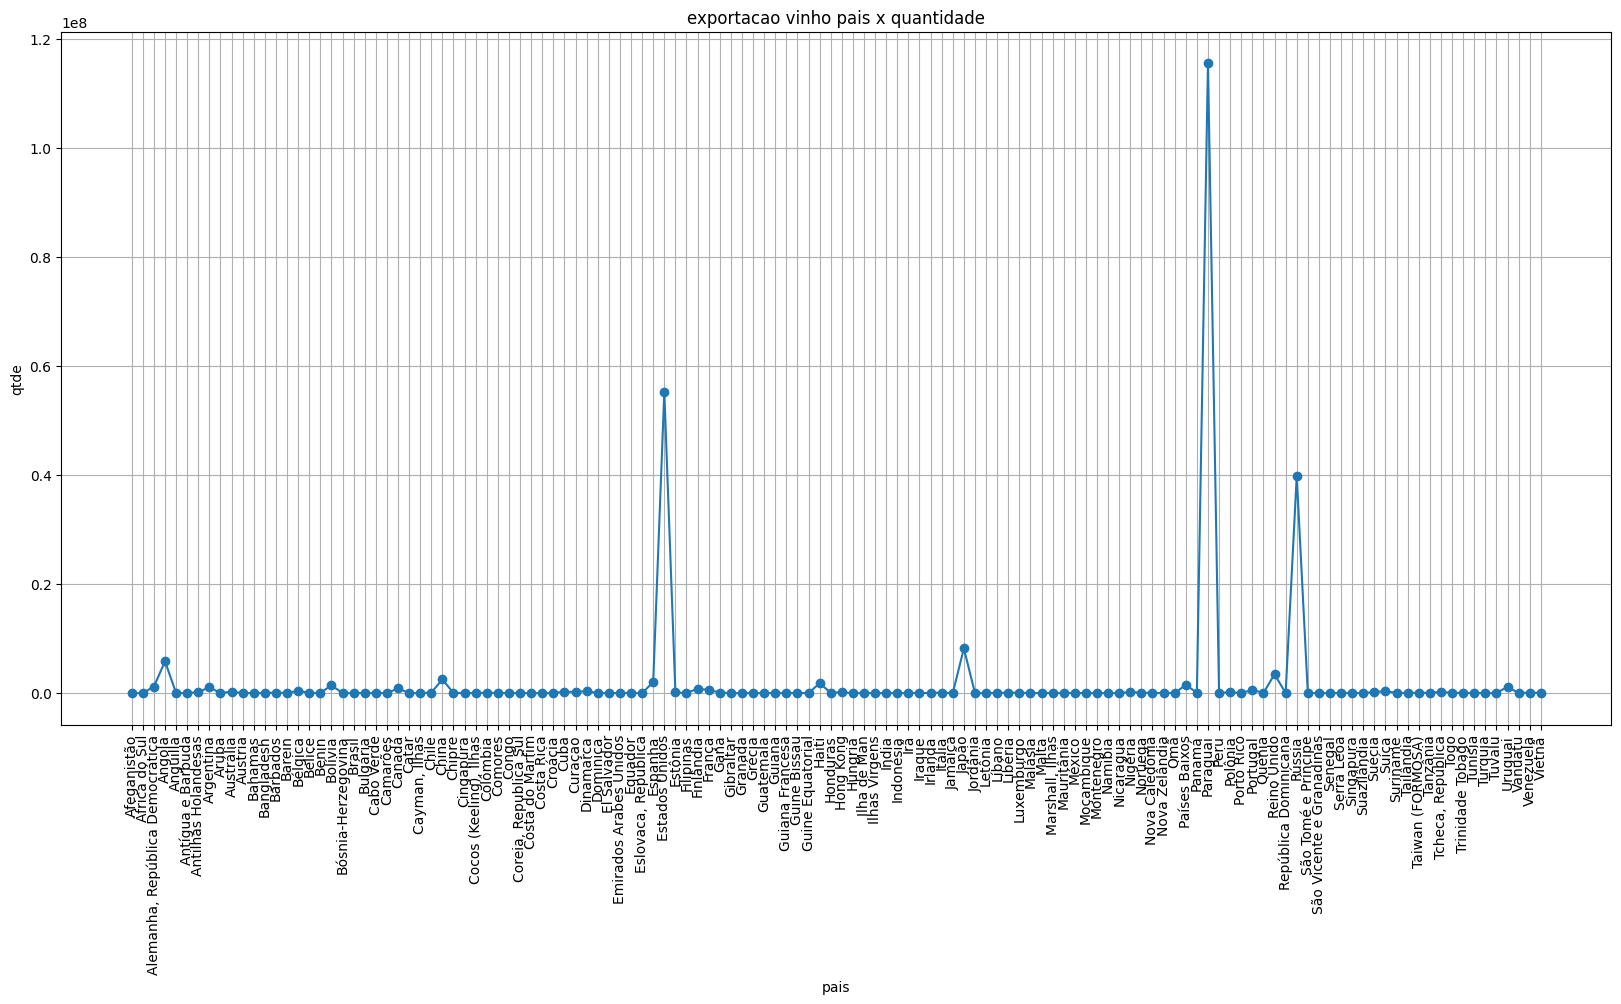

In [130]:
plt.figure(figsize=(20, 9))
plt.plot(df_exp_vinho_qtde['País'], df_exp_vinho_qtde['qtde_total'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho pais x quantidade')
plt.xlabel('pais')
plt.ylabel('qtde')
plt.show()

#### Tabela exportação

In [131]:

# Função para classificar com base no índice
def classificar(index):
    if str(index).endswith('.1'):
        return 'valor'
    else:
        return 'quantidade'
    

In [132]:
df_exp_vinho_tab = df_exp_vinho_qtde
# filtro das colunas sem total 
df_exp_vinho_tab = df_exp_vinho_tab.iloc[:, :-2]
# renomeis o índice para Ano
df_exp_vinho_tab = df_exp_vinho_tab.rename(columns={'País':'Ano'})
# seta o índice para o ano
df_exp_vinho_tab = df_exp_vinho_tab.set_index('Ano')
# faz o transpose da tabela
df_exp_vinho_tab = df_exp_vinho_tab.T

# criação da coluna 'total_geral'
df_exp_vinho_tab['total_geral'] = df_exp_vinho_tab.sum(axis=1)
# cria uma classificação para 'quantidade' e para 'valor'
df_exp_vinho_tab['classe'] = df_exp_vinho_tab.index.map(classificar)
# alteração do índice do tipo string retirando o '.1'
df_exp_vinho_tab.index = df_exp_vinho_tab.index.map(lambda x: x.replace('.1', ''))
df_exp_vinho_tab

Ano,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Argentina,Aruba,Austrália,...,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã,total_geral,classe
1970,0,0,0,0,0,0,280,0,0,0,...,0,0,0,0,0,0,0,0,136009,quantidade
1970,0,0,0,0,0,0,207,0,0,0,...,0,0,0,0,0,0,0,0,40500,valor
1971,0,0,0,0,0,0,4800,0,0,0,...,0,0,0,0,0,0,3200,0,281305,quantidade
1971,0,0,0,0,0,0,3705,0,0,0,...,0,0,0,0,0,0,2000,0,83465,valor
1972,0,0,4168,0,0,0,3000,0,0,0,...,0,0,0,0,0,0,1350,0,381020,quantidade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,0,21,32605,0,0,1864,0,4176,0,3413,...,0,0,0,4,0,31,9808,584,6078288,valor
2021,11,0,2698,0,0,805,0,6,0,705,...,0,0,343,0,136774,0,26415,0,8058704,quantidade
2021,46,0,6741,0,0,2268,0,13,0,4034,...,0,0,878,0,149842,0,35944,0,9851942,valor
2022,0,0,7630,4068,0,419,0,480,0,1424,...,0,0,418,0,637117,0,23220,130,7025983,quantidade


In [146]:
df_exp_total_por_ano = df_exp_vinho_tab[df_exp_vinho_tab['classe'] == 'valor'][['total_geral']].astype(int)
df_exp_total_por_ano.head()

Ano,total_geral
1970,40500
1971,83465
1972,121097
1973,174792
1974,185871


In [133]:
df_pais_valor = df_exp_vinho_tab[df_exp_vinho_tab['classe'] == 'valor']
df_pais_valor = df_pais_valor.drop(columns={'total_geral','classe'})
df_pais_valor = df_pais_valor.T
df_pais_valor['valor_total'] = df_pais_valor.sum(axis=1)
df_pais_valortotal = df_pais_valor[['valor_total']]
df_pais_valortotal.reset_index(inplace=True)
df_pais_valortotal = df_pais_valortotal.rename(columns={'Ano':'pais'})
df_pais_valortotal.head()

,pais,valor_total
0,Afeganistão,46
1,África do Sul,1789
2,"Alemanha, República Democrática",3121585
3,Angola,4859836
4,Anguilla,186


In [134]:
# df_pais_valortotal

filtro_pais = ['NO_PAIS', 'NO_PAIS_ING']

df_pais = df_pais[filtro_pais]
df_pais = df_pais.rename(columns={'NO_PAIS':'pais', 'NO_PAIS_ING':'pais_ing'})
df_pais_valortotal_nomes = pd.merge(df_pais_valortotal, df_pais, how='left', on='pais')
filtro_paistotal = ['pais_ing', 'pais','valor_total']
# filtro_paistotal = ['pais_ing', 'pais','valor_total', 'norm', 'cor']
df_pais_valortotal_nomes = df_pais_valortotal_nomes[filtro_paistotal]
df_pais_valortotal_nomes


,pais_ing,pais,valor_total
0,Afghanistan,Afeganistão,46
1,South Africa,África do Sul,1789
2,NaN,"Alemanha, República Democrática",3121585
3,Angola,Angola,4859836
4,Anguilla,Anguilla,186
...,...,...,...
123,Tuvalu,Tuvalu,4
124,Uruguay,Uruguai,1453190
125,Vanuatu,Vanuatu,31
126,Venezuela,Venezuela,133144


In [140]:
df_pais_valortotal_nomes[['pais', 'valor_total']].sort_values(by='valor_total', ascending=False).head(10)

,pais,valor_total
97,Paraguai,85606168
48,Estados Unidos,71504688
105,Rússia,25914397
103,Reino Unido,8317001
75,Japão,7043882
3,Angola,4859836
28,China,4778033
95,Países Baixos,4287747
47,Espanha,3867723
2,"Alemanha, República Democrática",3121585


In [ ]:
import streamlit as st
import pandas as pd
import pydeck as pdk

# Suponha que você tenha um DataFrame 'df' com as colunas 'País', 'Latitude' e 'Longitude'
# df = pd.read_csv('seu_arquivo.csv')

# Lista de países para o seletor
lista_paises = ['Brasil', 'Estados Unidos', 'Canadá', 'Alemanha', 'França']  # Complete com sua lista de países

# Função para filtrar o DataFrame com base no país selecionado
def filtrar_pais(df, pais):
    return df[df['País'] == pais]

# Inicializar o aplicativo Streamlit
st.title('Mapa de Países')

# Selecionar o país
pais_selecionado = st.selectbox('Escolha um país', lista_paises)

# Filtrar os dados
df_filtrado = filtrar_pais(df_pais_valortotal, pais_selecionado)

# Definir a configuração do mapa
view_state = pdk.ViewState(latitude=df_filtrado['Latitude'].mean(),
                           longitude=df_filtrado['Longitude'].mean(),
                           zoom=5)

# Criar o mapa
mapa = pdk.Deck(
    layers=[pdk.Layer(
        'ScatterplotLayer',
        data=df_filtrado,
        get_position='[Longitude, Latitude]',
        get_color='[200, 30, 0, 160]',
        get_radius=20000,
    )],
    initial_view_state=view_state,
)

# Mostrar o mapa
st.pydeck_chart(mapa)


In [135]:
df_pais_valortotal_nomes

,pais_ing,pais,valor_total
0,Afghanistan,Afeganistão,46
1,South Africa,África do Sul,1789
2,NaN,"Alemanha, República Democrática",3121585
3,Angola,Angola,4859836
4,Anguilla,Anguilla,186
...,...,...,...
123,Tuvalu,Tuvalu,4
124,Uruguay,Uruguai,1453190
125,Vanuatu,Vanuatu,31
126,Venezuela,Venezuela,133144


In [137]:
import plotly.express as px


# Normalizando os valores para o intervalo [0, 1]
df_pais_valortotal_nomes['norm'] = (df_pais_valortotal_nomes['valor_total'] - 
                              df_pais_valortotal_nomes['valor_total'].min()) / (df_pais_valortotal_nomes['valor_total'].max() - 
                                                                         df_pais_valortotal_nomes['valor_total'].min())

# Criando o gráfico de mapa com uma escala de cores contínua
fig = px.choropleth(
    df_pais_valortotal_nomes,
    locations='pais_ing',  # Esta coluna deve conter nomes de países reconhecíveis por Plotly
    locationmode='country names',
    color='norm',  # Use a coluna normalizada para o mapeamento de cores
    hover_name='pais',
    hover_data=['valor_total'],
    color_continuous_scale=['green', 'yellow', 'red']  # Define a escala de cor do verde para vermelho
)

# Mostrar o gráfico
fig.show()


#### Paraguai

In [ ]:
df_paraquai_qtd = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'quantidade'][['Paraguai']]
df_paraquai_valor = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'valor'][['Paraguai']]

In [79]:
df_exp_vinho_paraguai_qtde = df_exp_vinho_qtde.loc[df_exp_vinho_qtde['País'] == 'Paraguai', :]
df_exp_vinho_paraguai_qtde = df_exp_vinho_paraguai_qtde.iloc[:, :-2]
df_exp_vinho_paraguai_qtde = df_exp_vinho_paraguai_qtde.set_index('País')
colunas_qtde = [col for col in df_exp_vinho_paraguai_qtde.columns if not col.endswith('.1')]
df_exp_vinho_paraguai_qtde = df_exp_vinho_paraguai_qtde[colunas_qtde]
df_exp_vinho_paraguai_qtde = df_exp_vinho_paraguai_qtde.T
df_exp_vinho_paraguai_qtde.head()

País,Paraguai
1970,89846
1971,237805
1972,291625
1973,332433
1974,243294


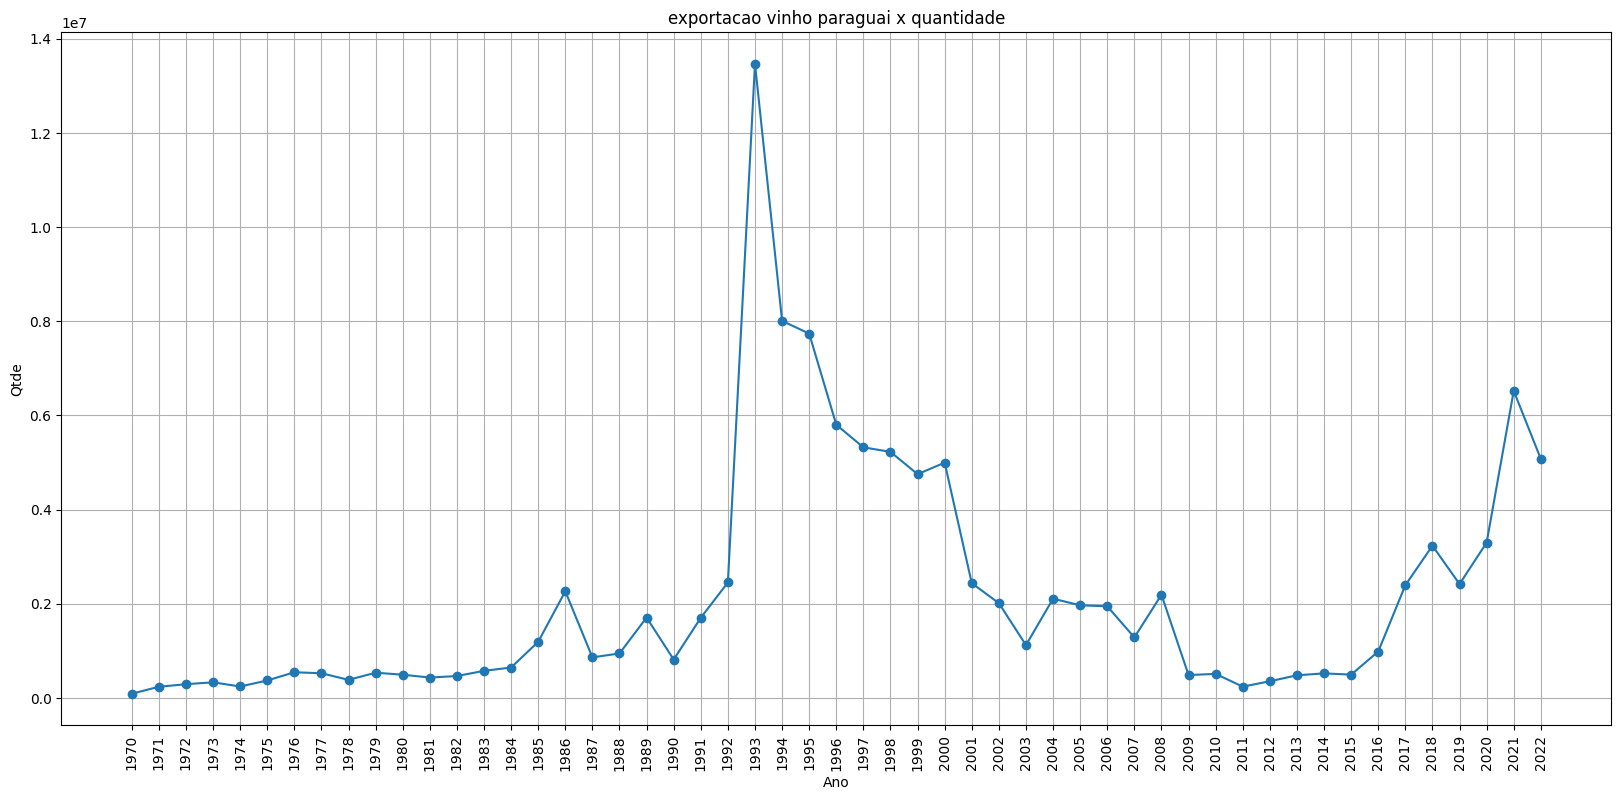

In [66]:
plt.figure(figsize=(20, 9))
plt.plot(df_exp_vinho_paraguai_qtde.index, df_exp_vinho_paraguai_qtde['Paraguai'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho paraguai x quantidade')
plt.xlabel('Ano')
plt.ylabel('Qtde')
plt.show()

In [77]:
df_exp_vinho_paraguai_valor = df_exp_vinho_qtde.loc[df_exp_vinho_qtde['País'] == 'Paraguai', :]
df_exp_vinho_paraguai_valor = df_exp_vinho_paraguai_valor.iloc[:, :-2]
df_exp_vinho_paraguai_valor = df_exp_vinho_paraguai_valor.set_index('País')
colunas_valor = [col for col in df_exp_vinho_qtde.columns if col.endswith('.1')]
df_exp_vinho_paraguai_valor = df_exp_vinho_paraguai_valor[colunas_valor]
df_exp_vinho_paraguai_valor = df_exp_vinho_paraguai_valor.T
df_exp_vinho_paraguai_valor.head()

País,Paraguai
1970.1,23980
1971.1,64075
1972.1,84402
1973.1,115041
1974.1,119429


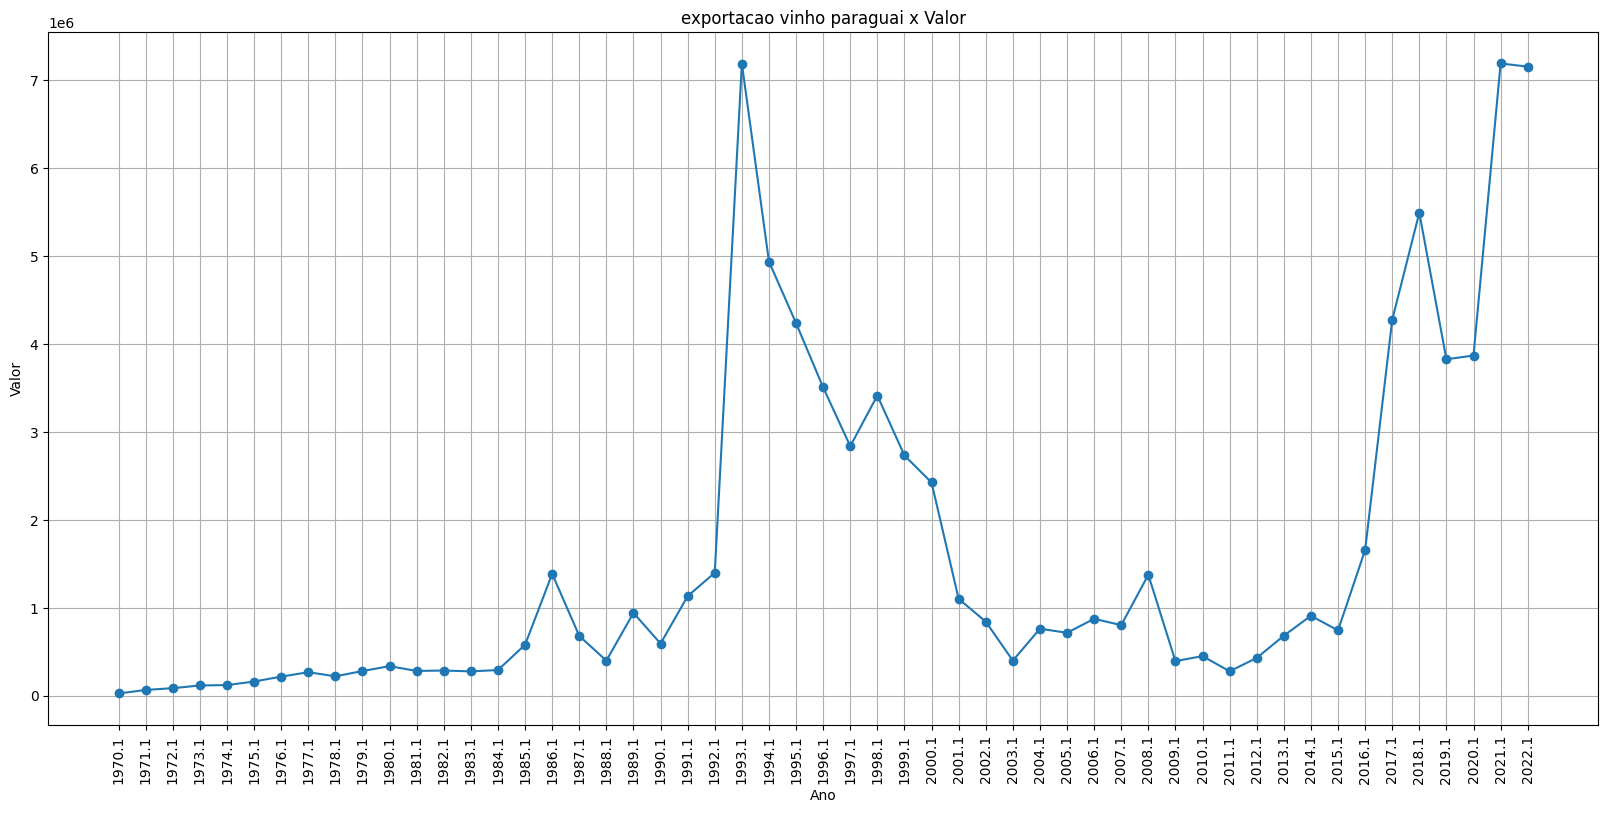

In [78]:
plt.figure(figsize=(20, 9))
plt.plot(df_exp_vinho_paraguai_valor.index, df_exp_vinho_paraguai_valor['Paraguai'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho paraguai x Valor')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.show()

#### Estados Unidos

In [29]:
df_usa_qtd = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'quantidade'][['Estados Unidos']]

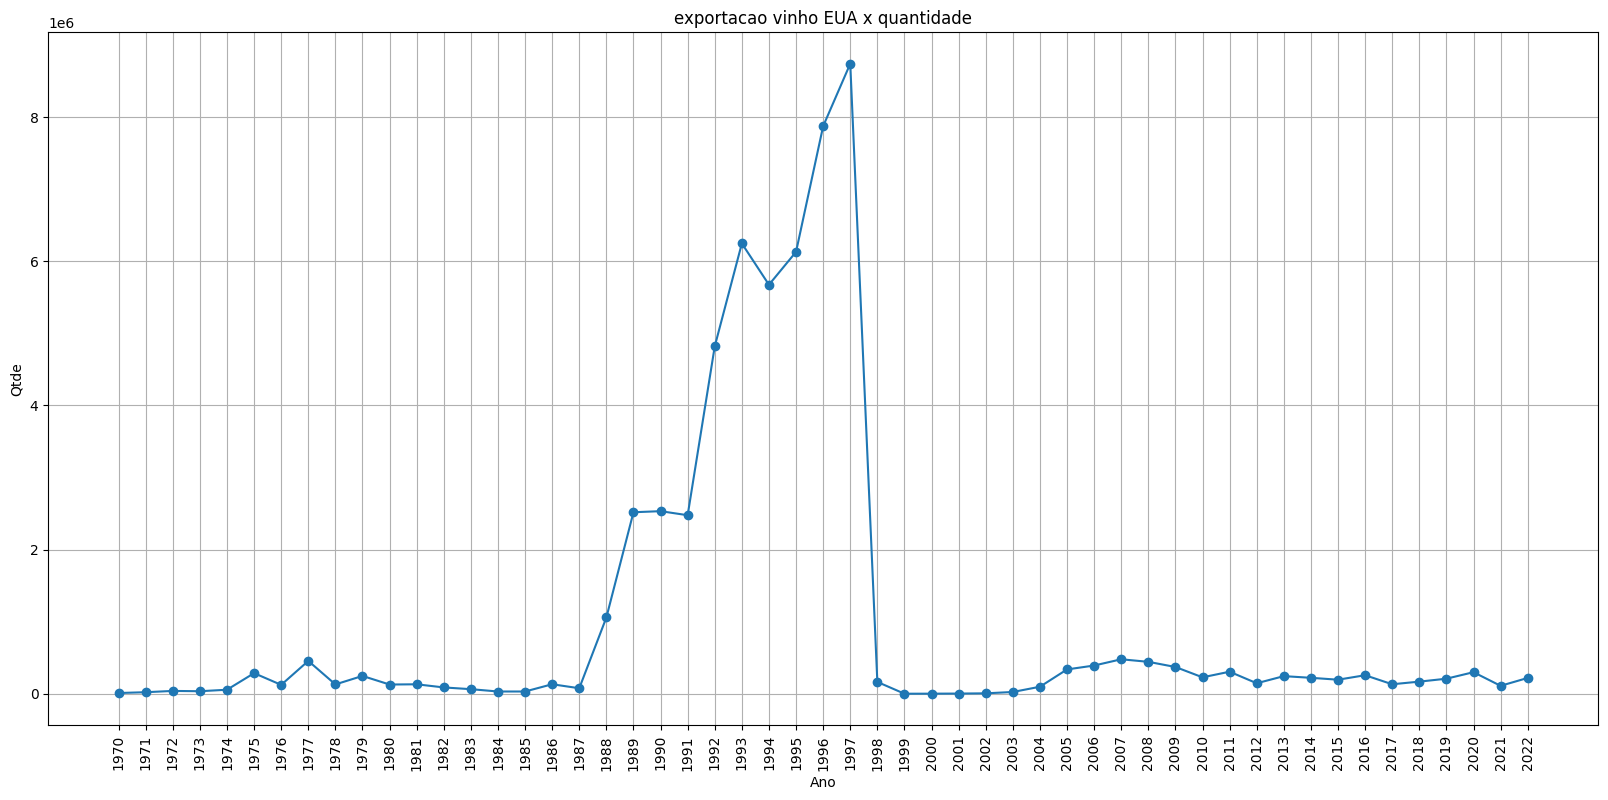

In [30]:
plt.figure(figsize=(20, 9))
plt.plot(df_usa_qtd.index, df_usa_qtd['Estados Unidos'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho EUA x quantidade')
plt.xlabel('Ano')
plt.ylabel('Qtde')
plt.show()

In [31]:
df_usa_valor = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'valor'][['Estados Unidos']]

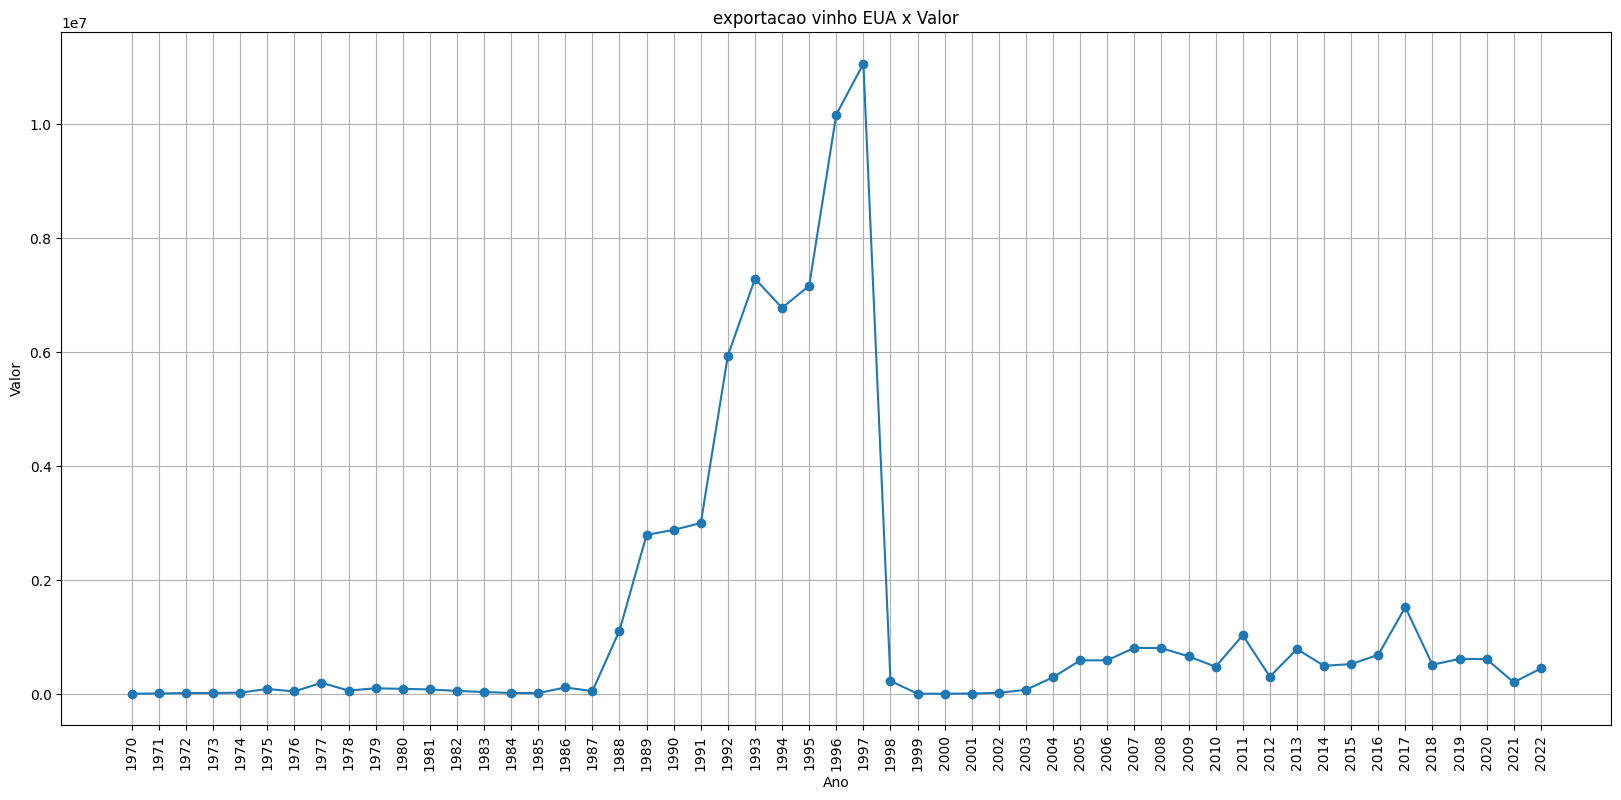

In [32]:
plt.figure(figsize=(20, 9))
plt.plot(df_usa_valor.index, df_usa_valor['Estados Unidos'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho EUA x Valor')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.show()

#### Rússia

In [37]:
df_rusia_qtd = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'quantidade'][['Rússia']]

In [38]:
df_rusia_valor = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'valor'][['Rússia']]

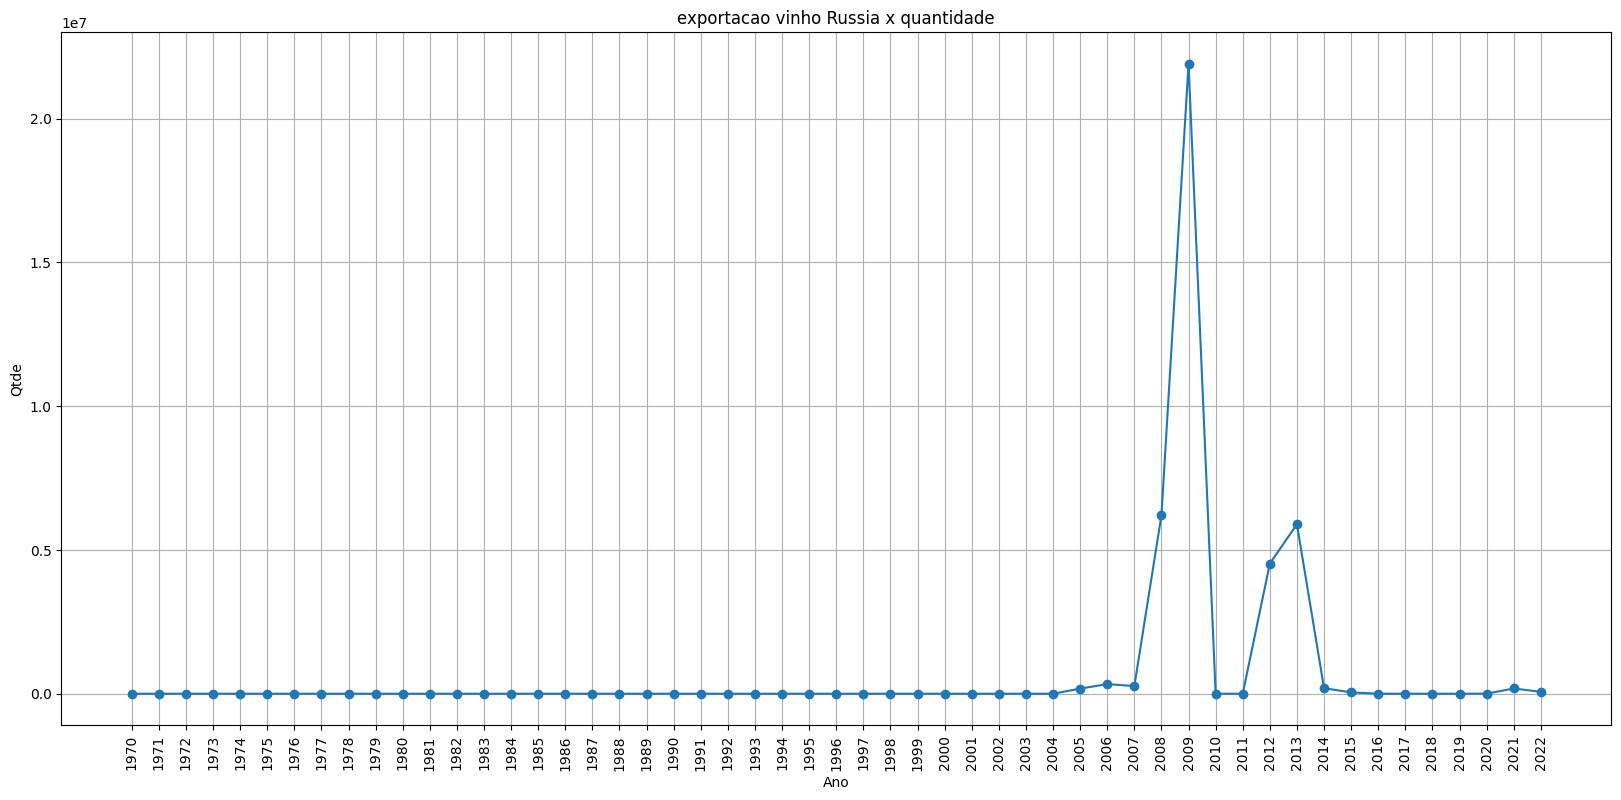

In [39]:
plt.figure(figsize=(20, 9))
plt.plot(df_rusia_qtd.index, df_rusia_qtd['Rússia'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho Russia x quantidade')
plt.xlabel('Ano')
plt.ylabel('Qtde')
plt.show()

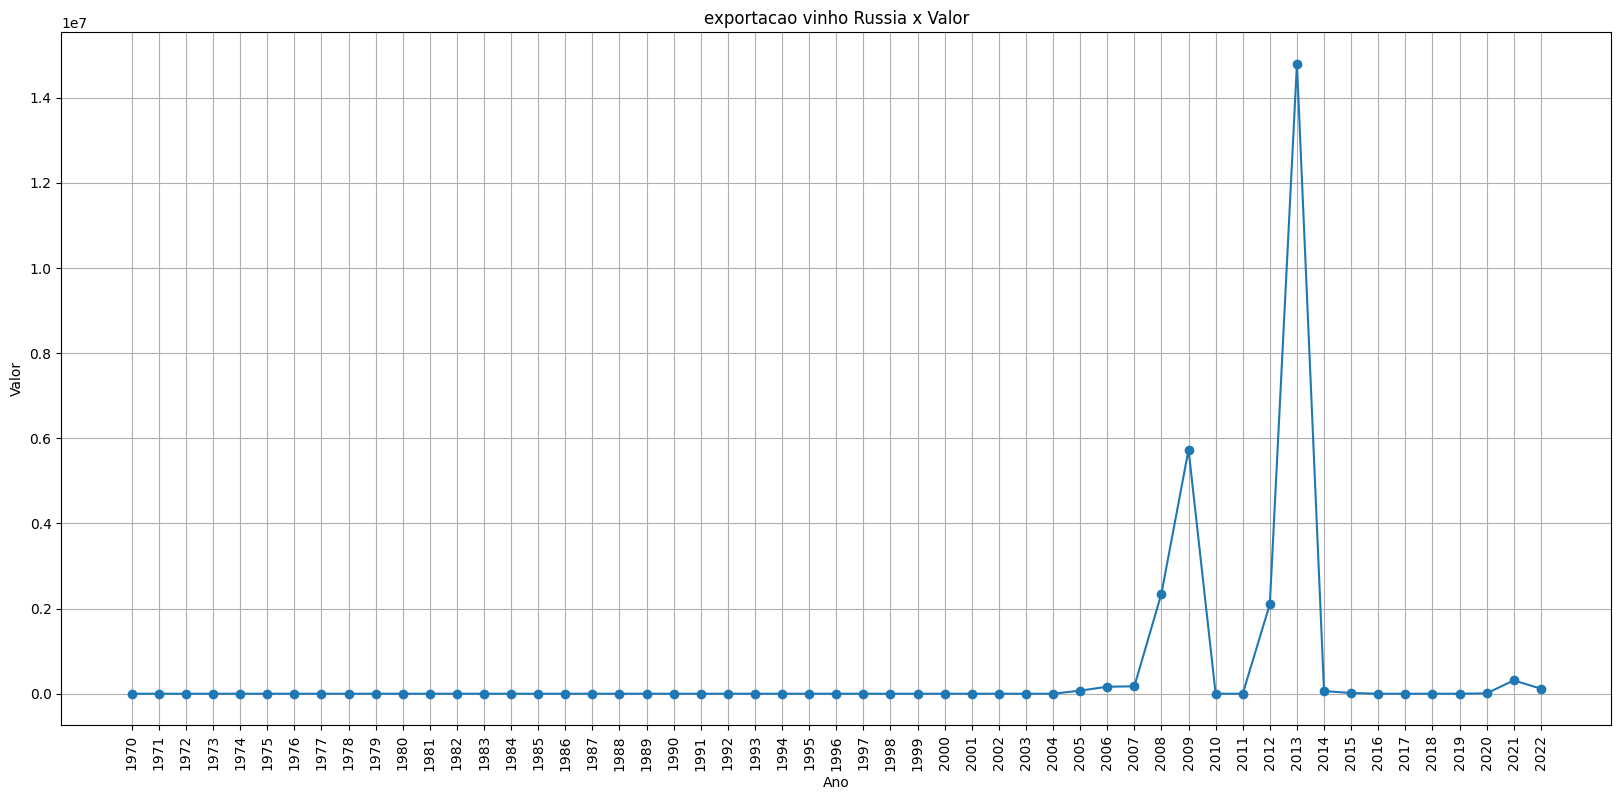

In [40]:
plt.figure(figsize=(20, 9))
plt.plot(df_rusia_valor.index, df_rusia_valor['Rússia'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho Russia x Valor')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.show()

#### Japão

In [41]:
df_jp_qtd = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'quantidade'][['Japão']]

In [42]:
df_jp_valor = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'valor'][['Japão']]

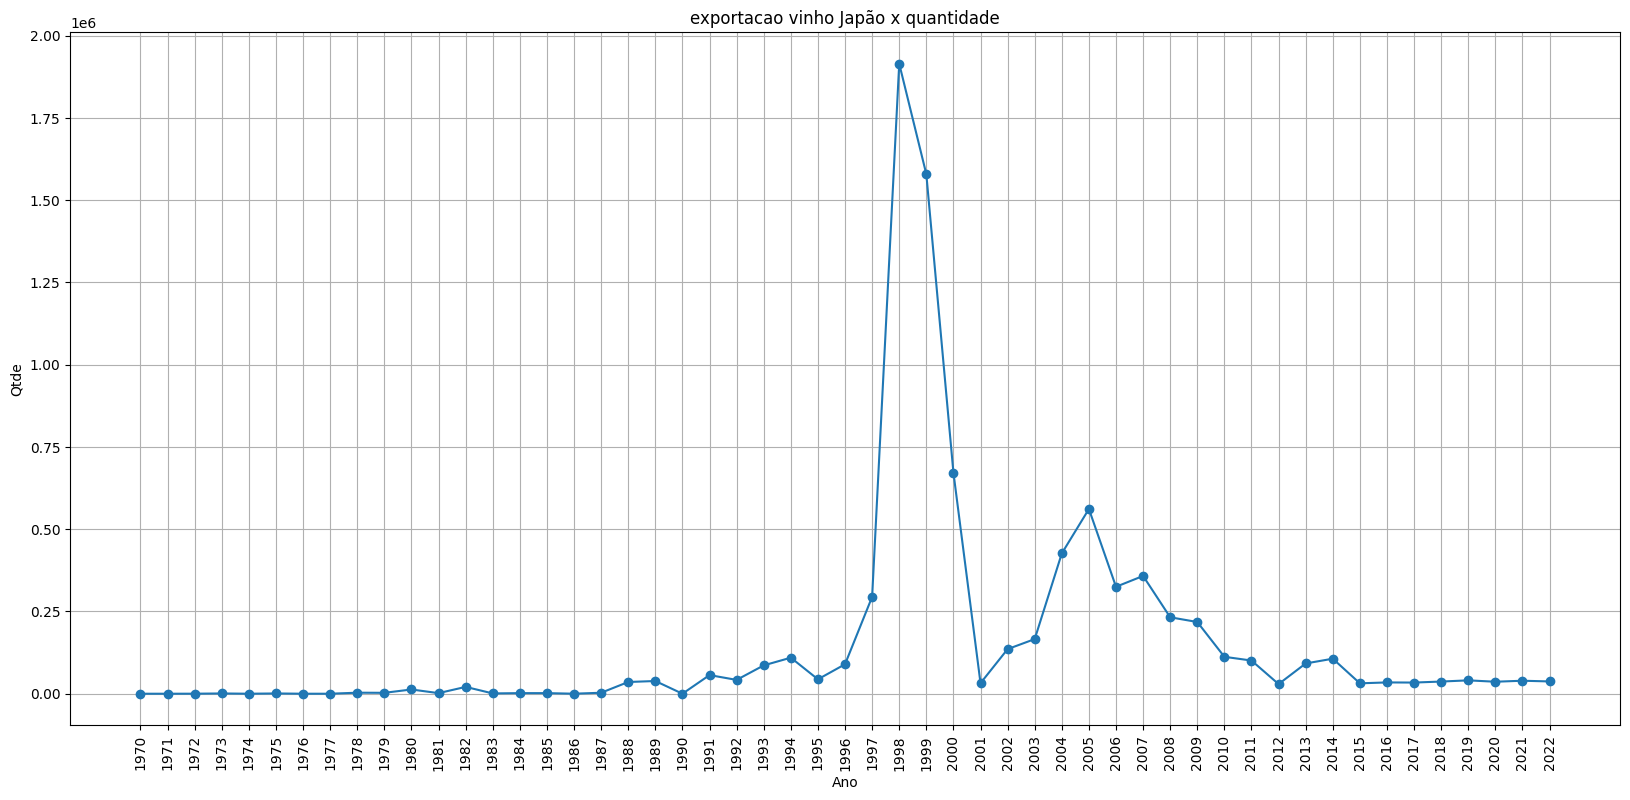

In [43]:
plt.figure(figsize=(20, 9))
plt.plot(df_jp_qtd.index, df_jp_qtd['Japão'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho Japão x quantidade')
plt.xlabel('Ano')
plt.ylabel('Qtde')
plt.show()

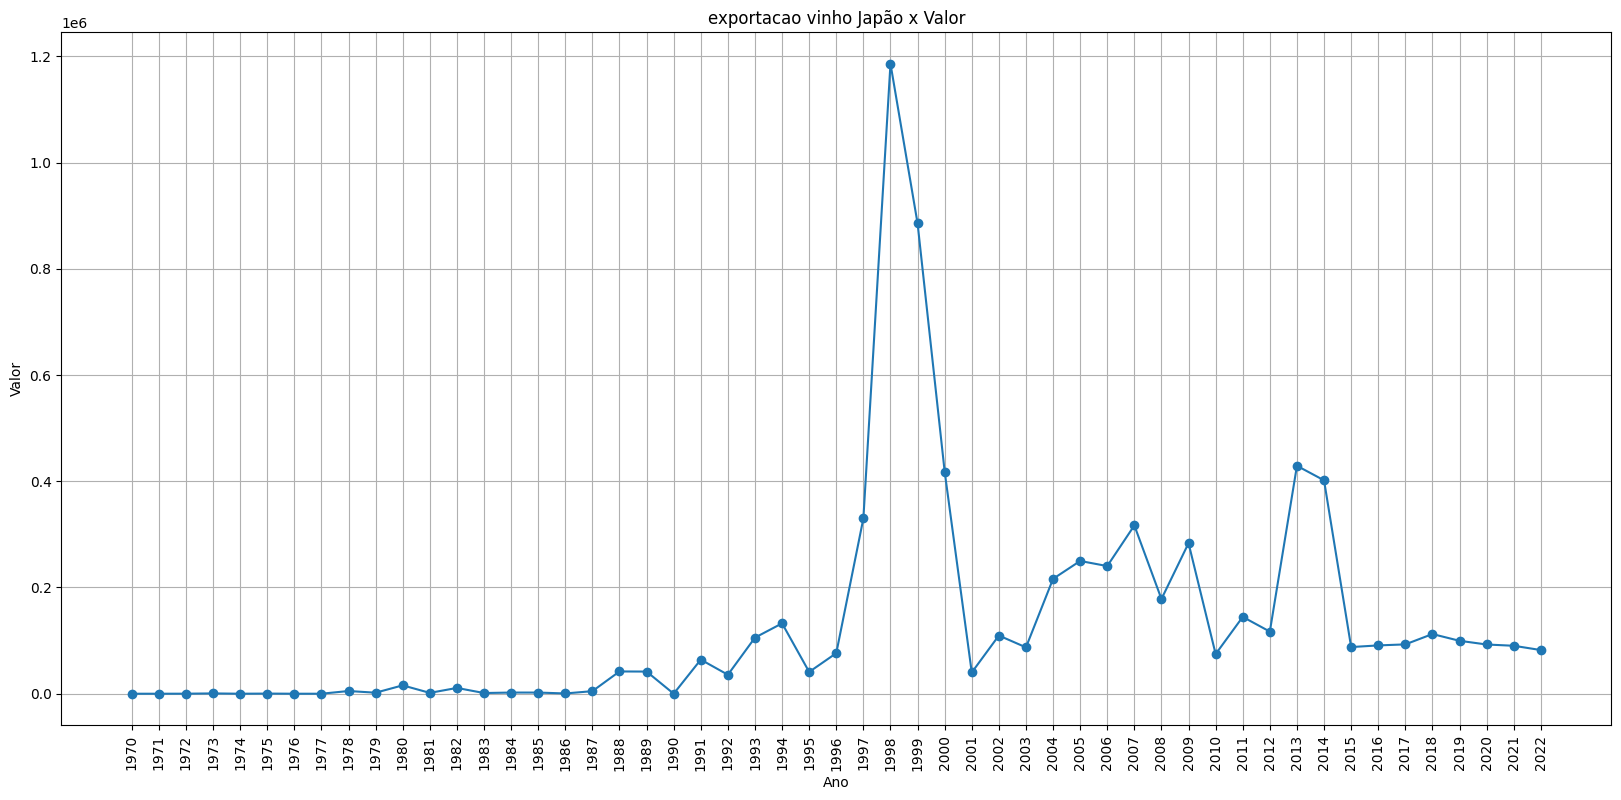

In [44]:
plt.figure(figsize=(20, 9))
plt.plot(df_jp_valor.index, df_jp_valor['Japão'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho Japão x Valor')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.show()

#### China

In [45]:
df_china_qtd = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'quantidade'][['China']]

In [46]:
df_china_valor = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'valor'][['China']]

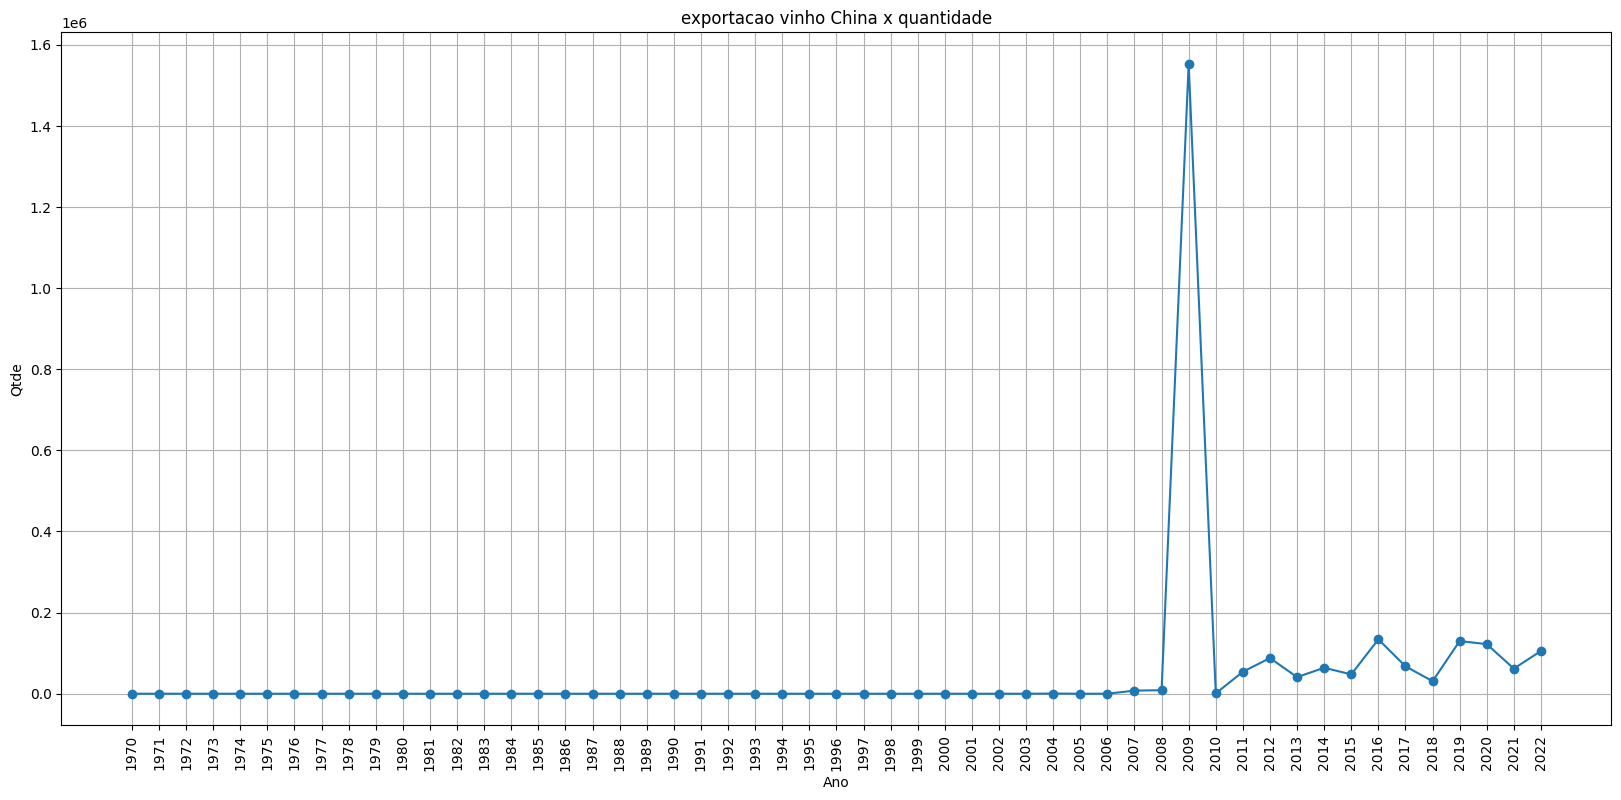

In [48]:
plt.figure(figsize=(20, 9))
plt.plot(df_china_qtd.index, df_china_qtd['China'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho China x quantidade')
plt.xlabel('Ano')
plt.ylabel('Qtde')
plt.show()

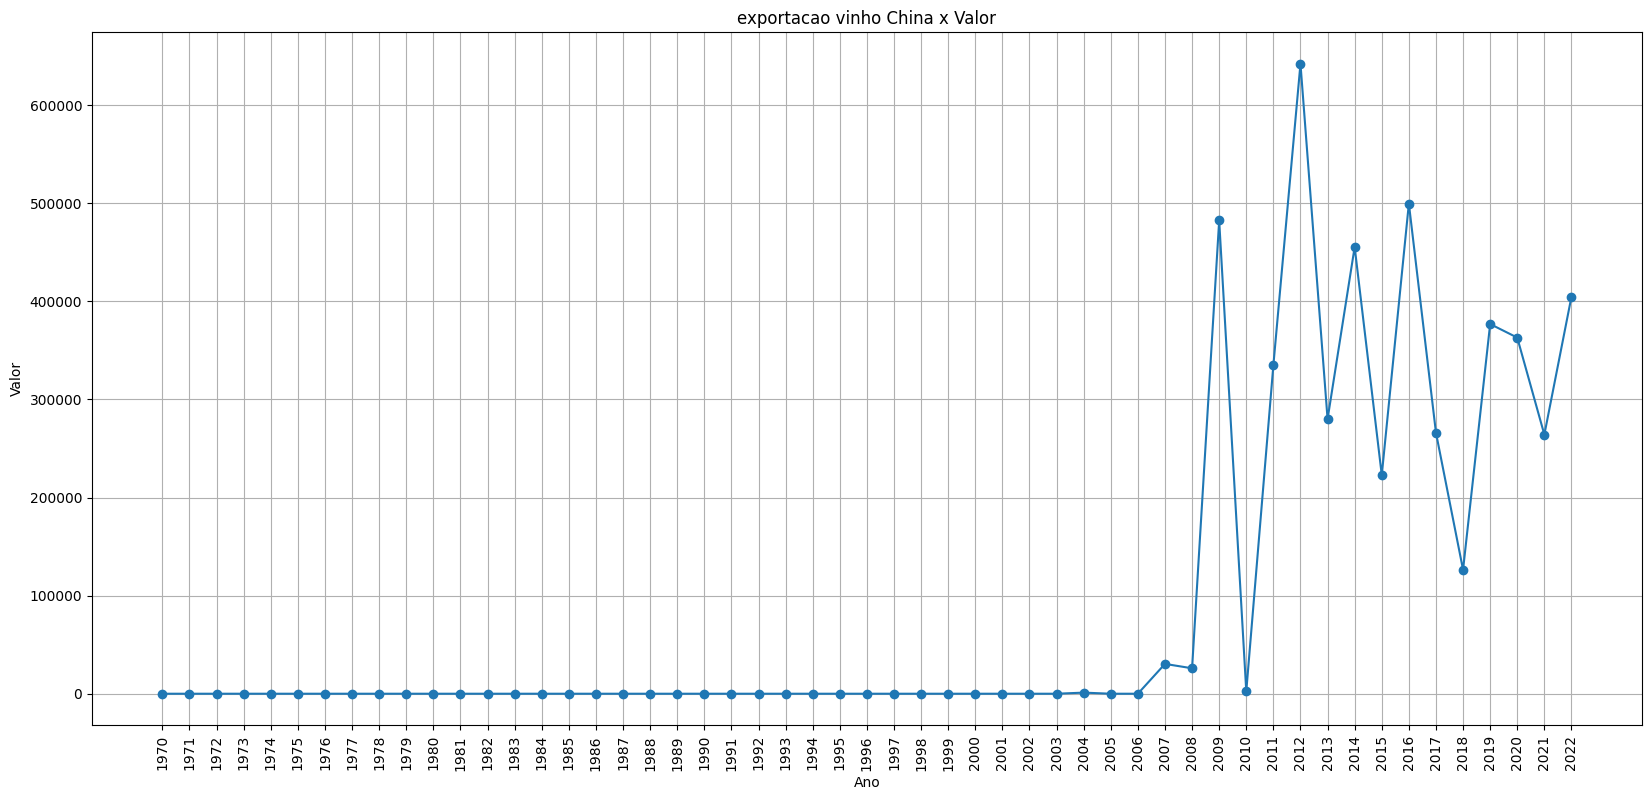

In [49]:
plt.figure(figsize=(20, 9))
plt.plot(df_china_valor.index, df_china_valor['China'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho China x Valor')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.show()

#### VINHO ORGÂNICO

<function matplotlib.pyplot.show(close=None, block=None)>

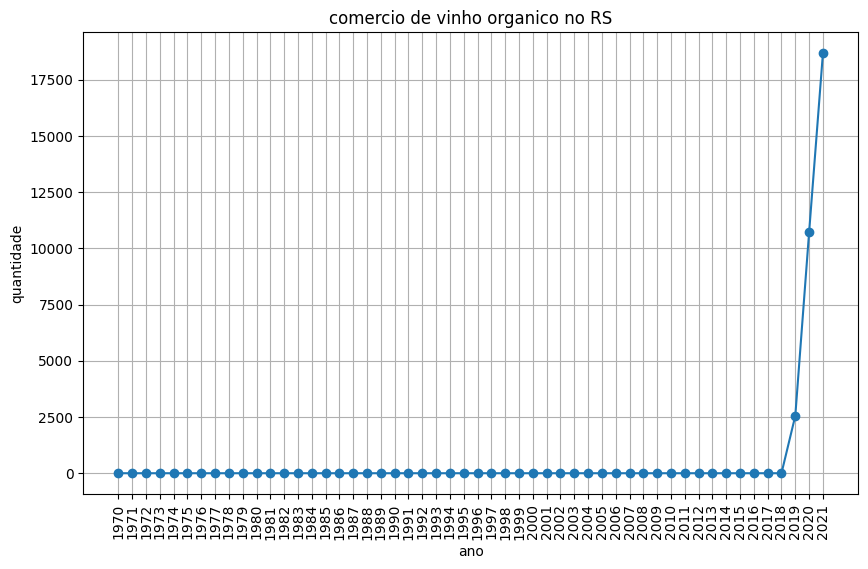

In [18]:
df_comercio_vinho_grafico_organico = df_comercio_vinho.transpose()
df_comercio_vinho_grafico_organico = df_comercio_vinho_grafico_organico.iloc[:, :15]

df_comercio_vinho_grafico_organico['Total Vinho'] = df_comercio_vinho_grafico_organico['VINHO ORGÂNICO']

plt.figure(figsize=(10, 6))
plt.plot(df_comercio_vinho_grafico_organico.index, df_comercio_vinho_grafico_organico['Total Vinho'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('comercio de vinho organico no RS')
plt.xlabel('ano')
plt.ylabel('quantidade')
plt.show

<ipython-input-21-fa081e87c352>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_exp_vinho_final['media'] = df_exp_vinho_final[['País','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982',
<ipython-input-21-fa081e87c352>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp_vinho_final['media'] = df_exp_vinho_final[['País','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982',
<ipython-input-21-fa081e87c352>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

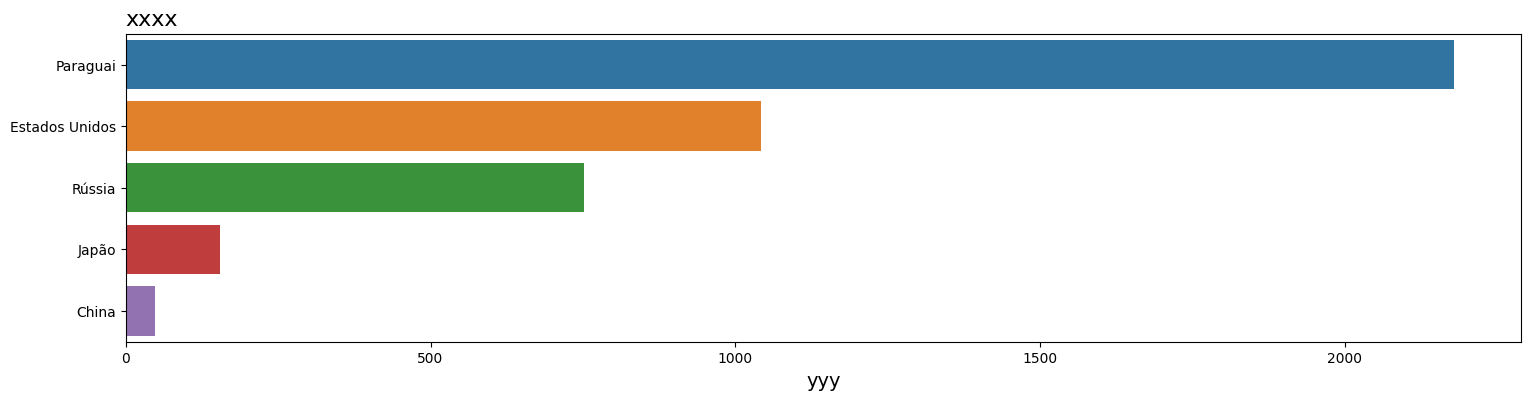

In [21]:
df_exp_vinho_final = df_exp_vinho.loc[df_exp_vinho['País'].isin(['Paraguai','Estados Unidos','Rússia','Japão','China'])]

df_exp_vinho_final['media'] = df_exp_vinho_final[['País','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982',
'1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
'2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019',
'2020','2021','2022']].mean(axis=1)

df_exp_vinho_final2 = df_exp_vinho_final[['País','media']]
#df_exp_vinho_final2['media'] = df_exp_vinho_final2['media'].map('{:.2f}'.format)
df_exp_vinho_final2['media'] = df_exp_vinho_final2['media'].astype(int)/1000
df_exp_vinho_final2.set_index('País', inplace=True)
df_exp_vinho_final2 = df_exp_vinho_final2.sort_values(by='media', ascending=False)




fig, ax = plt.subplots(figsize=(18,4))
ax = sns.barplot(data=df_exp_vinho_final2, y=df_exp_vinho_final2.index, x='media', orient='h')

ax.set_title('xxxx', loc='left', fontsize=16)
ax.set_xlabel('yyy', fontsize=14)
ax.set_ylabel('')
plt.show()

#df_exp_vinho_final2.head()

In [20]:
df_exp_vinho_final2.head()

,media
País,
Paraguai,2180070
Estados Unidos,1042621
Rússia,751094
Japão,154696
China,47500
